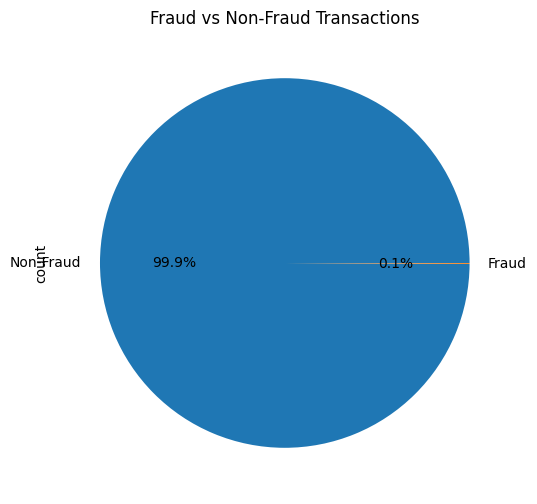

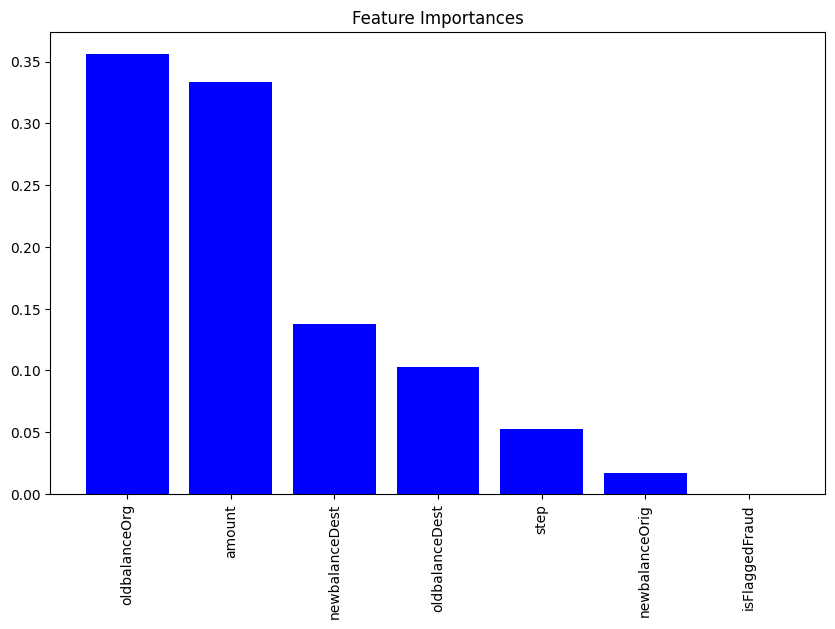

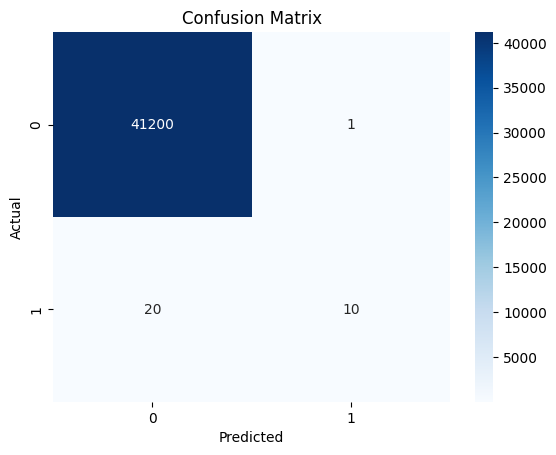

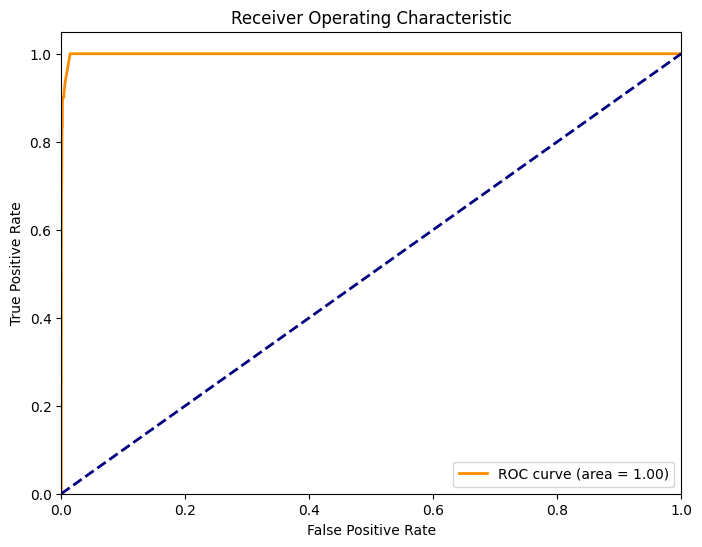

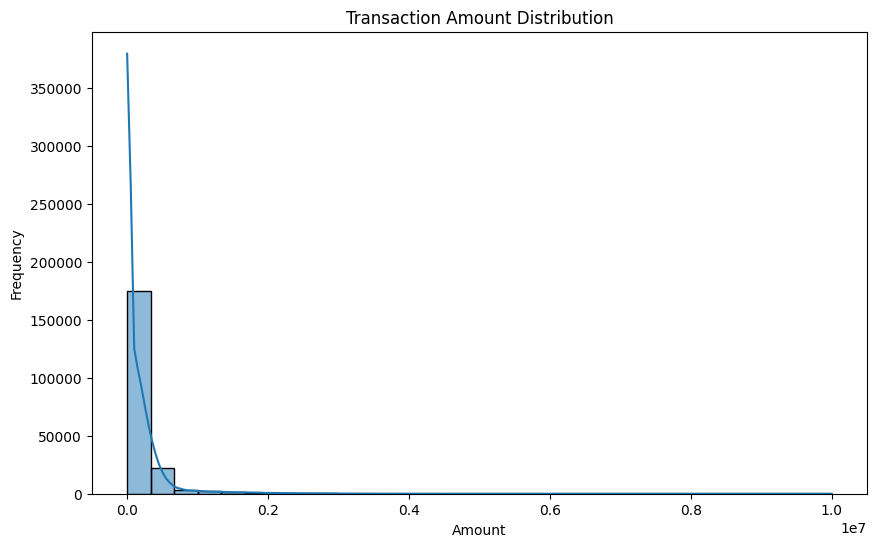

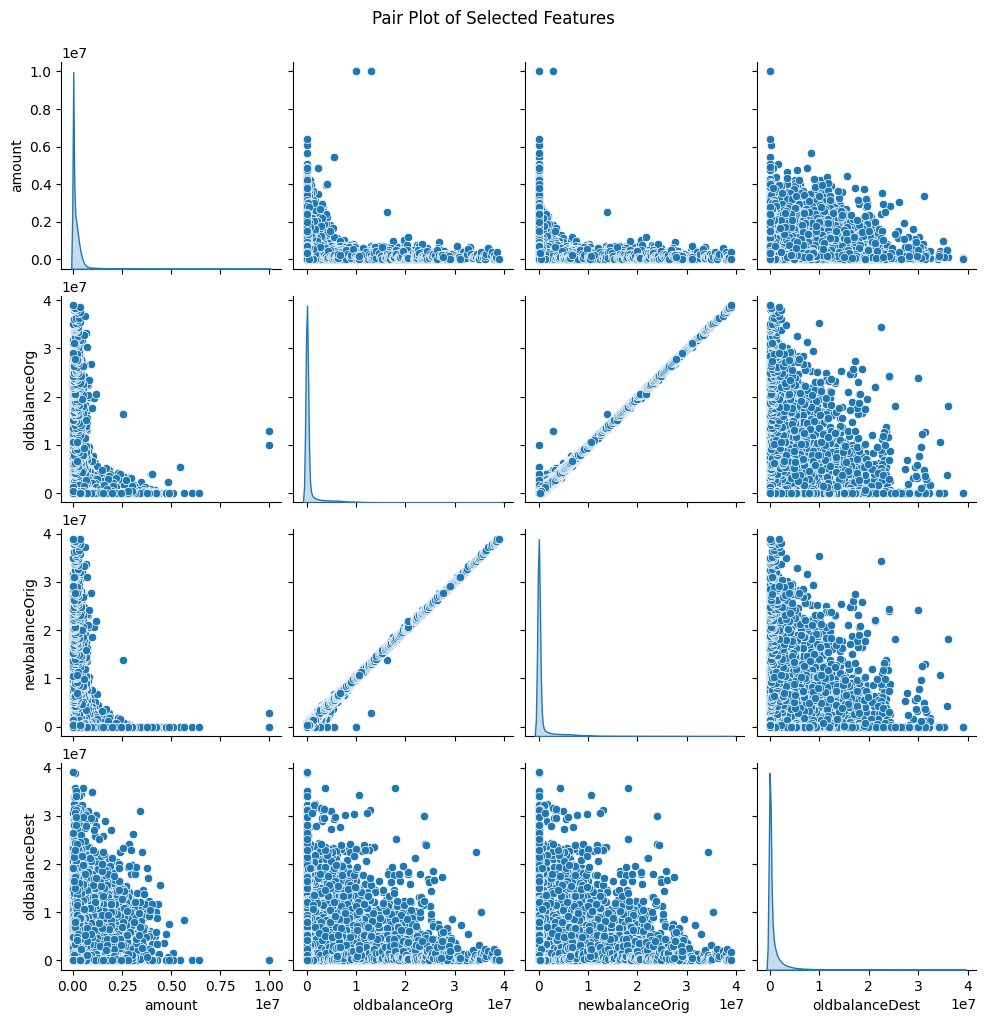

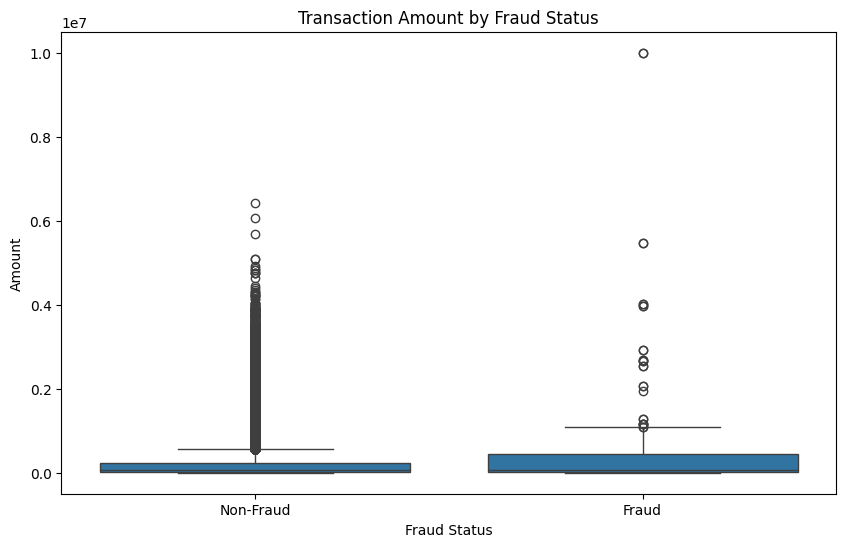

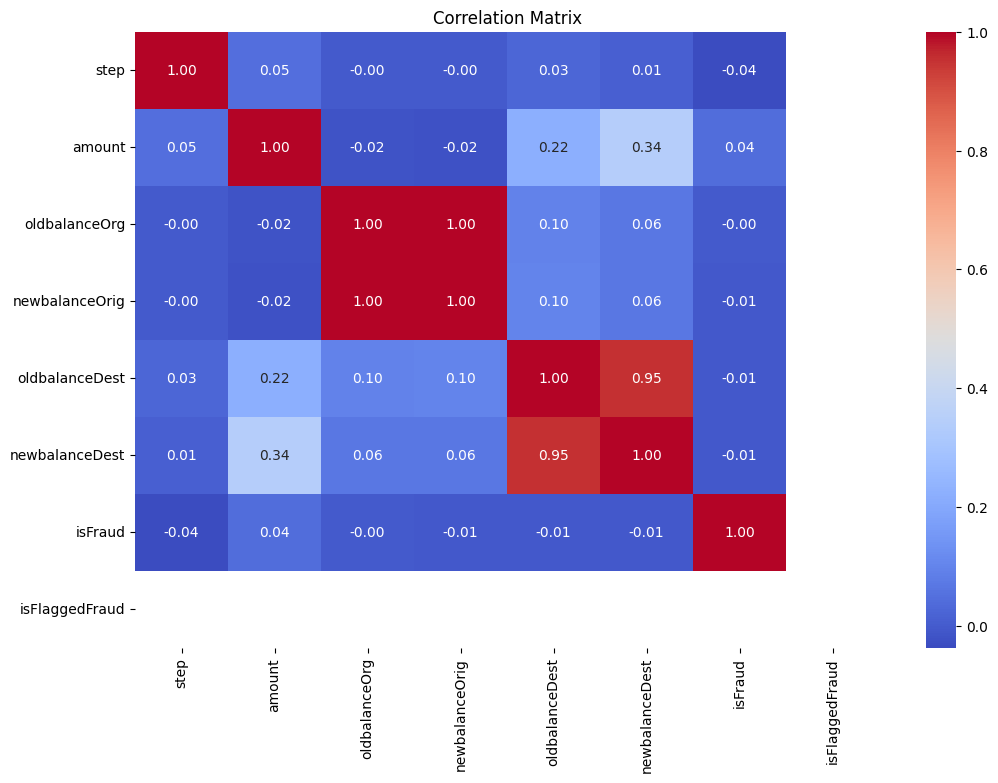

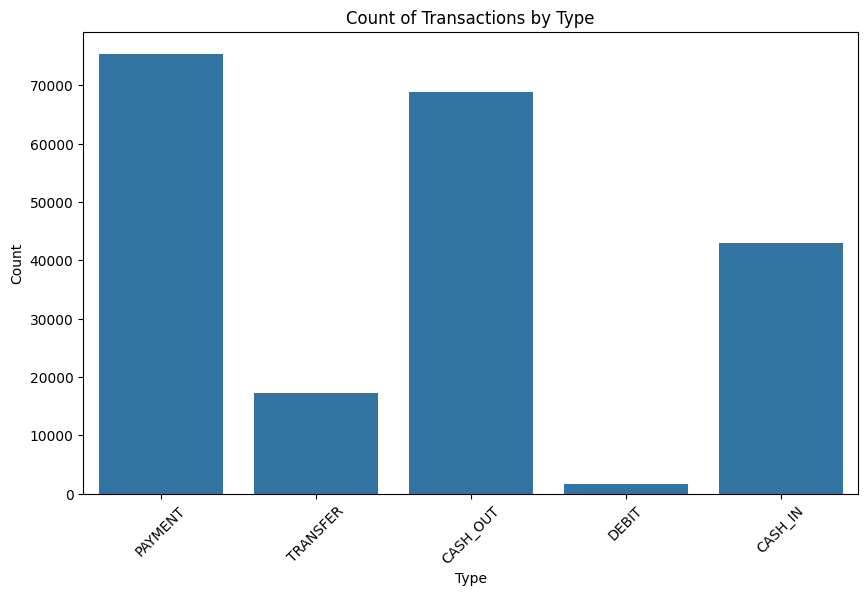

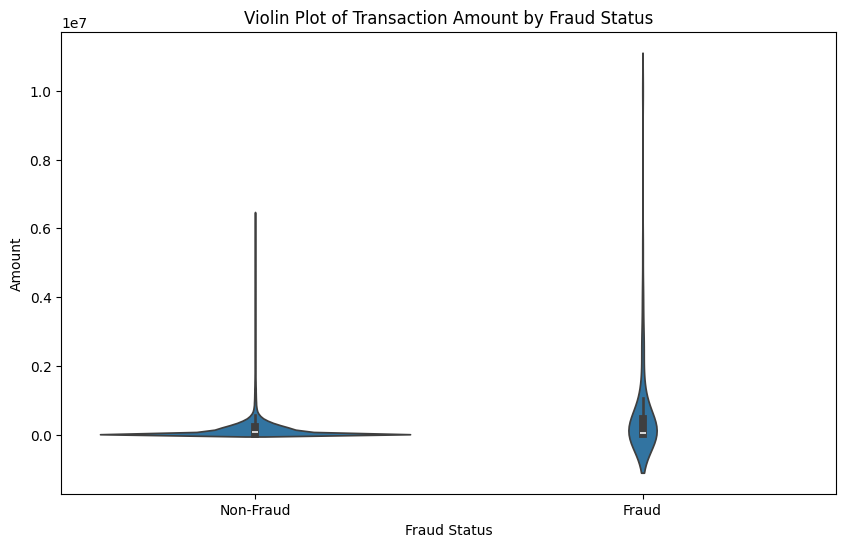

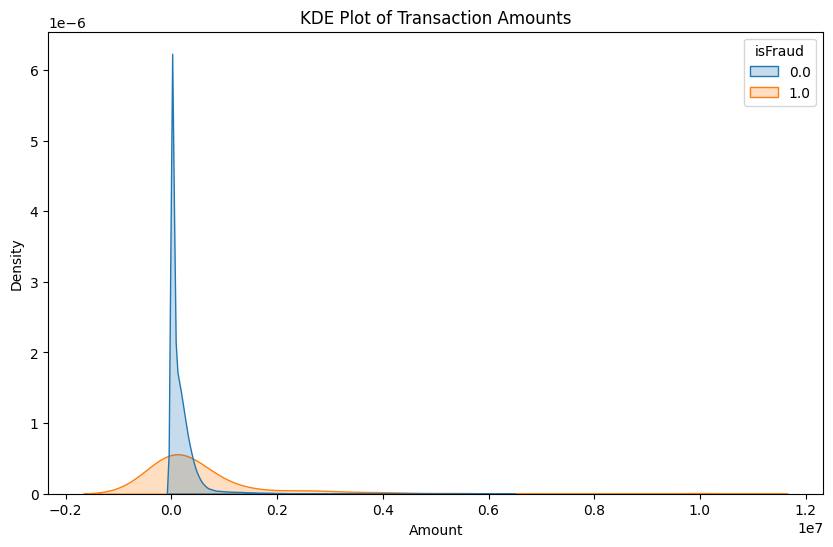

<ipython-input-3-bd748fb2532d>:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='isFraud', y='amount', data=data, jitter=True, palette=['#1f77b4', '#ff7f0e'])


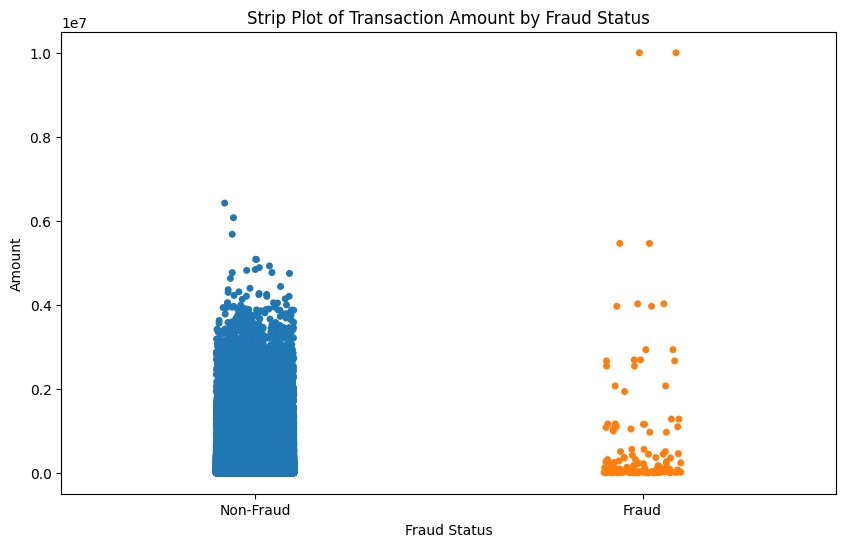

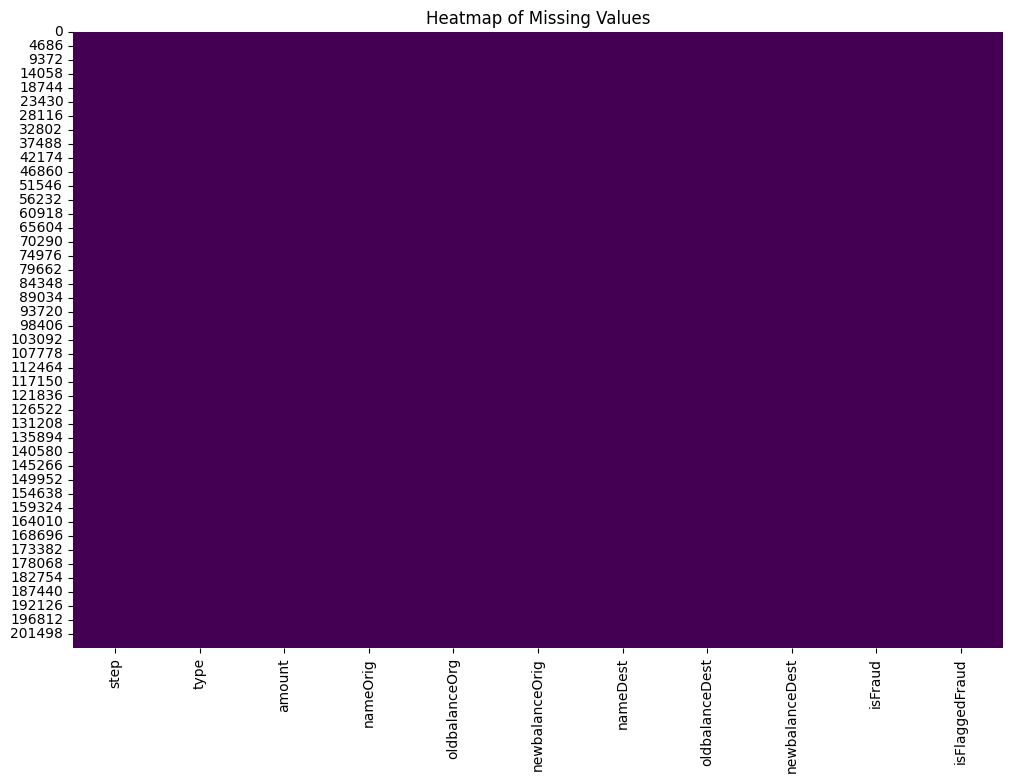

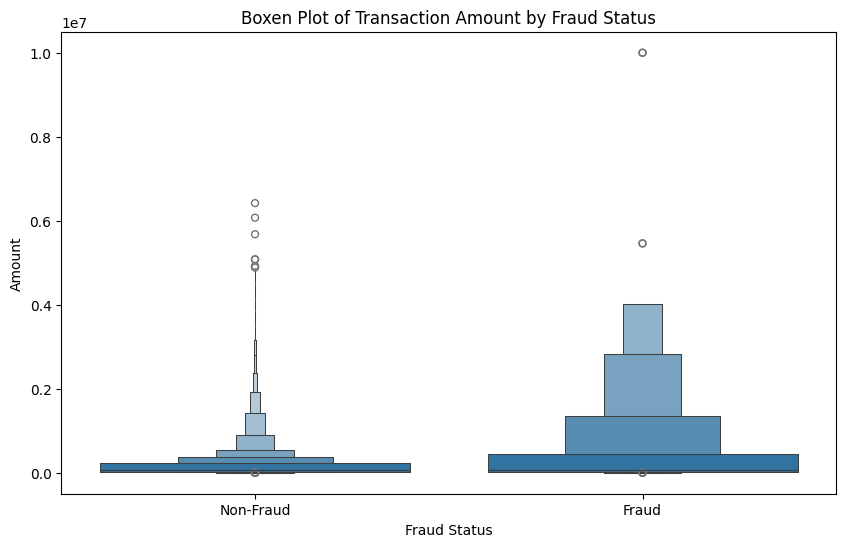

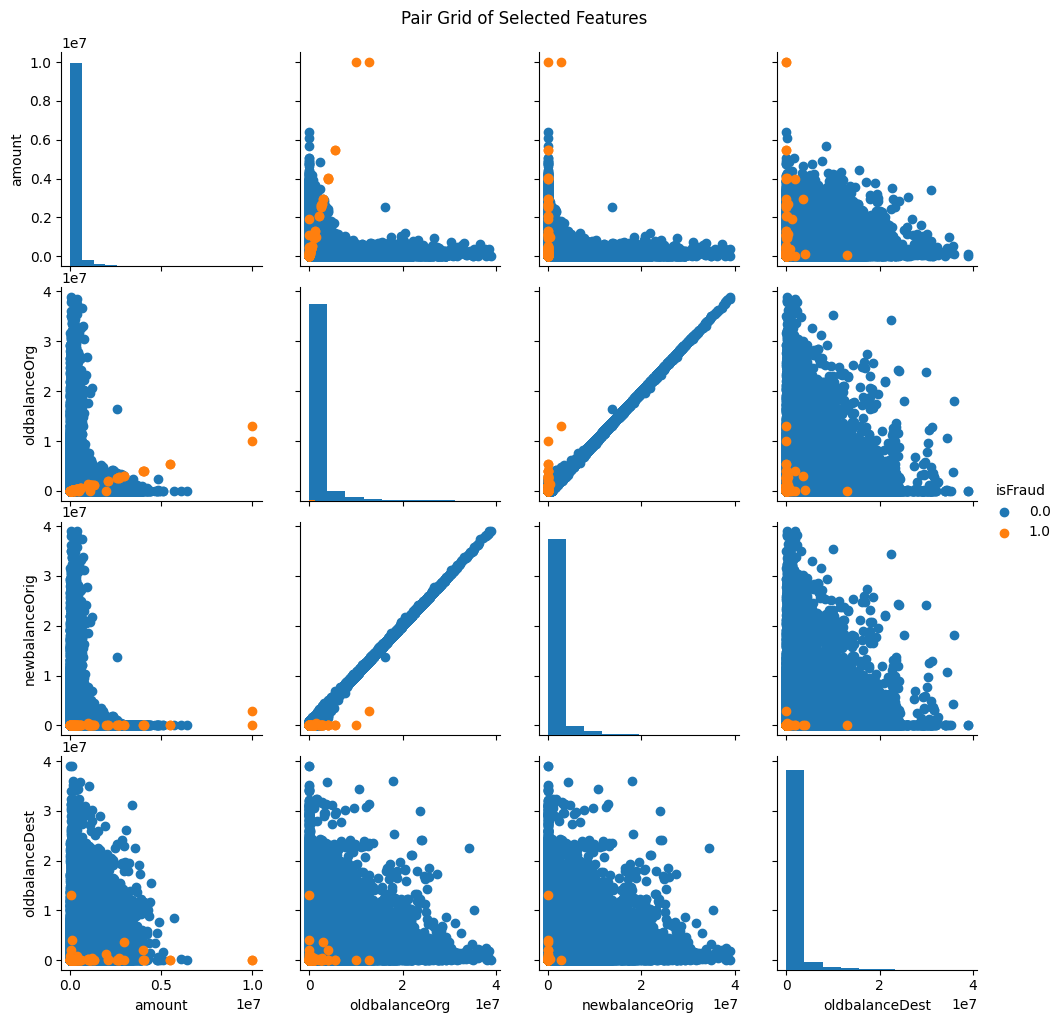

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Load dataset
# Update with your local file path
data = pd.read_csv('/content/Fraud Detection in Financial dataset.csv')

# Data Preprocessing
data.fillna(0, inplace=True)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Visualizations

# 1. Pie chart of class distribution
plt.figure(figsize=(6, 6))
data['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'], colors=['#1f77b4', '#ff7f0e'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

# 2. Bar plot of feature importances
importances = rf_model.feature_importances_
features = X.select_dtypes(include=[np.number]).columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.title('Feature Importances')
plt.show()

# 3. Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# 5. Histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# 6. Pair plot of selected features
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']  # Adjust as needed
sns.pairplot(data[selected_features], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# 7. Box plot of transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# 8. Correlation matrix heatmap
corr_matrix = data.select_dtypes(include=[np.number]).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 9. Count plot of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type')  # Assuming 'type' is a categorical feature
plt.title('Count of Transactions by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 10. Violin plot of transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='amount', data=data)
plt.title('Violin Plot of Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# 11. KDE plot of transaction amounts
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='amount', hue='isFraud', fill=True, common_norm=False, palette=['#1f77b4', '#ff7f0e'])
plt.title('KDE Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

# 12. Strip plot of transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.stripplot(x='isFraud', y='amount', data=data, jitter=True, palette=['#1f77b4', '#ff7f0e'])
plt.title('Strip Plot of Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# 13. Heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# 14. Boxen plot of transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.boxenplot(x='isFraud', y='amount', data=data)
plt.title('Boxen Plot of Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# 15. Pair grid of selected features
g = sns.PairGrid(data, vars=selected_features, hue='isFraud', palette=['#1f77b4', '#ff7f0e'])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g.add_legend()
plt.suptitle('Pair Grid of Selected Features', y=1.02)
plt.show()
